# **Tanıtım**

1980 yılında Robert Plutchik, On Aksiyomları'ndan esinlenerek sekiz duygunun bir tekerlek diyagramını oluşturdu: sevinç, güven, korku, şaşkınlık, üzüntü, iğrenme, öfke ve beklenti. Plutchik ayrıca yirmi dört "Birincil", "İkincil" ve "Üçüncül" çift (iki duygudan oluşan hisler) teorize etti. Tekerlekteki duygular dört grupta eşleştirilebilir:

Birincil çift = bir yaprak arası = Aşk = Sevinç + Güven
İkincil çift = iki yaprak arası = Kıskançlık = Üzüntü + Öfke
Üçüncül çift = üç yaprak arası = Utanç = Korku + İğrenme
Zıt duygular = dört yaprak arası = Beklenti ≠ Şaşkınlık
Bu duygusal tekerleğin duygu analiziyle bağlantısı, duyguların karmaşık ve ilişkili bir şekilde birbirine bağlı olduğunu gösterir. Duygusal tekerleğin çeşitli bileşenleri, duygusal analizde kullanılan algoritmaların geliştirilmesi ve duygusal içeriğin daha iyi anlaşılması için temel oluşturabilir. Örneğin, duygusal tekerleğin çiftleri, duygusal analiz modellerinde kullanılabilecek duygu çiftlerinin keşfedilmesine yol açabilir. Bu bağlamda, duygusal tekerleğin analizinde, duygular arasındaki ilişkileri ve duygusal içeriğin derinlemesine analizini içeren bir yaklaşım benimsenmelidir.

# **Veri ve Kütüphanelerin İçe Aktarılması**

In [1]:
# Bu Python 3 ortamı, birçok yardımcı analitik kütüphanesi ile birlikte gelir
# Kaggle/python docker görüntüsü tarafından tanımlanır: https://github.com/kaggle/docker-python
# Örneğin, yüklemek için birkaç faydalı paket şunlardır:

# NumPy, Python'da bilimsel hesaplamaları yapmak için kullanılan temel bir kütüphanedir.
import numpy as np # lineer cebir

# Pandas, veri analizi ve işleme için yaygın olarak kullanılan bir Python kütüphanesidir.
import pandas as pd # veri işleme, CSV dosya giriş/çıkışı (ör. pd.read_csv)

# Natural Language Toolkit (Doğal Dil İşleme Kütüphanesi), metin verileri üzerinde çalışmak için kullanılan bir kütüphanedir.
import nltk
#nltk.download()
#nltk.download('punkt')

# Seaborn, veri görselleştirme için kullanılan bir Python kütüphanesidir.
import seaborn as sns

# Matplotlib, grafikler ve görselleştirmeler oluşturmak için kullanılan bir Python kütüphanesidir.
import matplotlib.pyplot as plt

# Scikit-learn, Python'da makine öğrenimi için yaygın olarak kullanılan bir kütüphanedir.
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Giriş veri dosyaları "/kaggle/input/" dizininde bulunmaktadır.
# Örneğin, burayı çalıştırmak (çalıştırma veya Shift+Enter'a basma) tüm dosyaları giriş dizininde listeler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Şu anki dizine yazdığınız tüm sonuçlar çıktı olarak kaydedilir.


# **Veri Hakkında Bilgi Edinme**

In [2]:
# Veri setini yükle
dataset = pd.read_csv("/Users/berkaybakac/Desktop/Bitirme_Final/data/data.csv")

# Veri setinin 100 tane satırını göster
display(dataset.head(10000)[::100])
pd.set_option('display.max_rows', None)

,Sl no,Tweets,Search key,Feeling
0,1,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...",happy moments,happy
100,101,"#29: @small thing pjm 💜 ed ""@BTS_twt HAVE FUN...",amazing,happy
200,201,"#49: @Eyewitness News ed ""IEC satisfied with ...",satisfied,happy
300,301,"#73: @Emotions Invented by the Internet ed ""T...",gratitude,happy
400,401,"#14: @nivan ed ""RT @ChennaiIPL: Set the whist...",cheer,happy
...,...,...,...,...
9500,9504,"Tweet #60: @lucy cuzzupe tweeted ""RT @cjjosh: ...",painful,sad
9600,9604,"Tweet #5: @Sir Creaky tweeted ""RT @GraveyardBe...",weeping,sad
9700,9704,Tweet #26: @Rock * Scooby Do not add me to lis...,tragedy,sad
9800,9804,"Tweet #43: @Raoule V. tweeted ""@snobbygirl17 @...",very angry,angry


içe aktarılan duygu veri setine göz atalım.

# **Veri Seti Özeti**

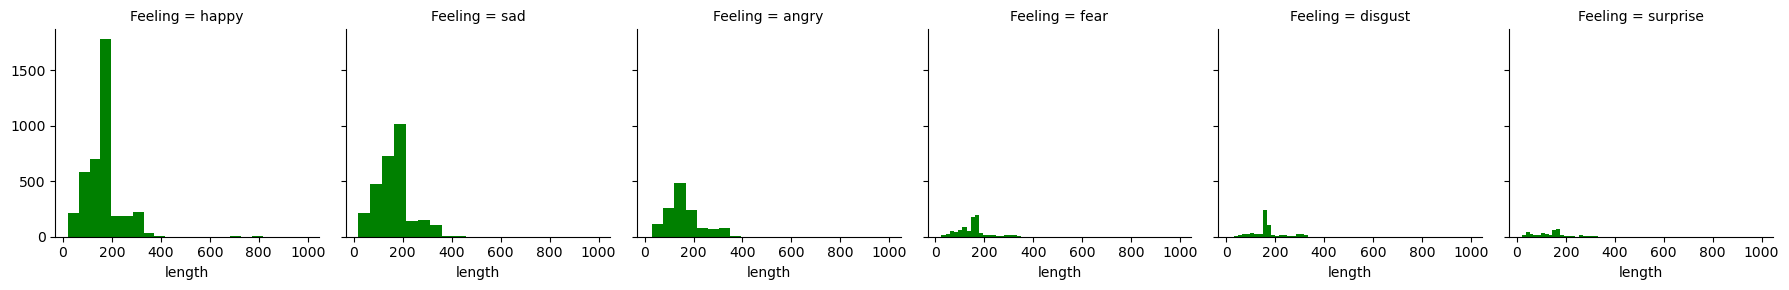

In [3]:
dataset.describe(include='all')

# 'Tweets' sütunundaki metinlerin uzunluklarını hesaplayarak 'length' adında yeni bir özellik ekleyin
dataset['length'] = dataset['Tweets'].apply(len)

# Veri setinin ilk birkaç satırını görüntüleme
dataset.head()

# Metin uzunluklarına göre duygu sınıflarının dağılımını görselleştirme
# sns.FacetGrid kullanarak duygu sınıflarına göre grafikler oluşturma
graph = sns.FacetGrid(data=dataset, col='Feeling')
# Grafiklere histogramlar ekleme ve 'length' özelliğini kullanarak metin uzunluklarını gösterme
graph.map(plt.hist, 'length', bins=20, color='Green')# Veri setinin istatistiksel özetini görüntüleme



# **İncelemelerdeki Yıldız Sayılarına Göre Oy Sütunlarının Ortalama Değerlerini Almak**

In [4]:
# Sadece sayısal sütunları seçin
numeric_df = dataset.select_dtypes(include=['number'])

# 'Feeling' sütunu dahil değilse, onu geri ekleyin
numeric_df['Feeling'] = dataset['Feeling']

# Duygu sınıflarına göre gruplayarak ortalamaları hesaplayın
val = numeric_df.groupby('Feeling').mean()

# Ortalama değerleri ekrana yazdırın
print(val)


                Sl no      length
Feeling                          
angry     4932.246085  165.794183
disgust   4262.874411  170.572998
fear      4122.549247  152.156431
happy     4560.091141  160.319501
sad       5739.734995  161.599158
surprise  7632.000000  136.441103


**OY SÜTUNLARI ARASINDAKİ KORELASYONU BULMAK**

In [5]:
val.corr()

,Sl no,length
Sl no,1.000000,-0.742981
length,-0.742981,1.000000


In [6]:
# 'Feeling' sütunundaki duygu etiketlerinin sayısını hesaplayın ve her bir duygu etiketinin sayısını görüntüleyin
dataset.Feeling.value_counts()



Feeling
happy       3928
sad         2849
angry       1341
fear         863
disgust      637
surprise     399
Name: count, dtype: int64

**VERİ SETİNİ GÖRSELLEŞTİRME**

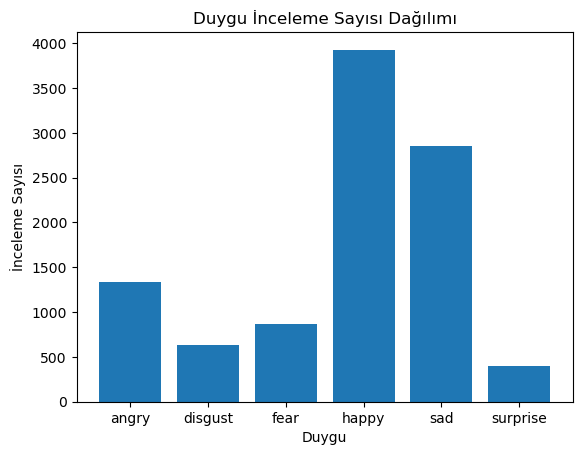

In [7]:
# Duygu inceleme sayısı dağılımını görselleştirme
plt.title('Duygu İnceleme Sayısı Dağılımı')

# 'Feeling' sütununa göre gruplayarak her bir duygu sınıfının inceleme sayısını hesaplayın
Sentiment_val = dataset.groupby('Feeling').count()

# Her bir duygu sınıfının inceleme sayısını çubuk grafik olarak gösterme
plt.bar(Sentiment_val.index.values, Sentiment_val['Tweets'])

# Eksen etiketlerini ve başlığı ekleme
plt.xlabel('Duygu')
plt.ylabel('İnceleme Sayısı')
plt.show()

**Veri Setimizden Semboller ve Sayılar Gibi İstenmeyen Unsurları Kaldırmak İçin Tokenizer Kullanma**

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

# Özel belirteç oluşturma
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# CountVectorizer kullanarak metin vektörlerine dönüştürme
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,1), tokenizer=token.tokenize, token_pattern=None)
text_counts = cv.fit_transform(dataset['Tweets'])

# TfidfVectorizer kullanarak metin vektörlerine dönüştürme
tf = TfidfVectorizer(tokenizer=token.tokenize, token_pattern=None)
text_tf = tf.fit_transform(dataset['Tweets'])


# **Eğitim ve Test Verileri**

In [9]:
# Bağımsız değişkenleri (x) ve bağımlı değişkeni (y) belirleme
x = text_tf  # Metin verileri vektörleri
y = dataset['Feeling']  # Duygu etiketleri

# Veri setini eğitim ve test setlerine ayırma
# test_size: test setinin oranı, random_state: rastgelelik kontrolü için kullanılan tohum
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


# **Karar Ağacı Sınıflandırıcısını Uygulama**

In [10]:
# Decision Tree sınıflandırıcı nesnesi oluşturma
dt = DecisionTreeClassifier()

# Oluşturulan modeli eğitim verisiyle eğitme
dt.fit(x_train, y_train)

# Test seti üzerinde tahmin yapma
preddt = dt.predict(x_test)

# Karışıklık matrisi (confusion matrix) hesaplama ve ekrana yazdırma
print("Karışıklık Matrisi (Confusion Matrix) for Decision Tree:")
print(confusion_matrix(y_test, preddt))


Karışıklık Matrisi (Confusion Matrix) for Decision Tree:
[[ 359    0    2   25    9    0]
 [   0  179    1   15    3    0]
 [   1    0  215   29    3    2]
 [  13    5   22 1135   39    8]
 [  13    2   10   65  733    7]
 [   0    1    0   14    2   94]]


Confusion matrix, without normalization
[[ 359    0    2   25    9    0]
 [   0  179    1   15    3    0]
 [   1    0  215   29    3    2]
 [  13    5   22 1135   39    8]
 [  13    2   10   65  733    7]
 [   0    1    0   14    2   94]]


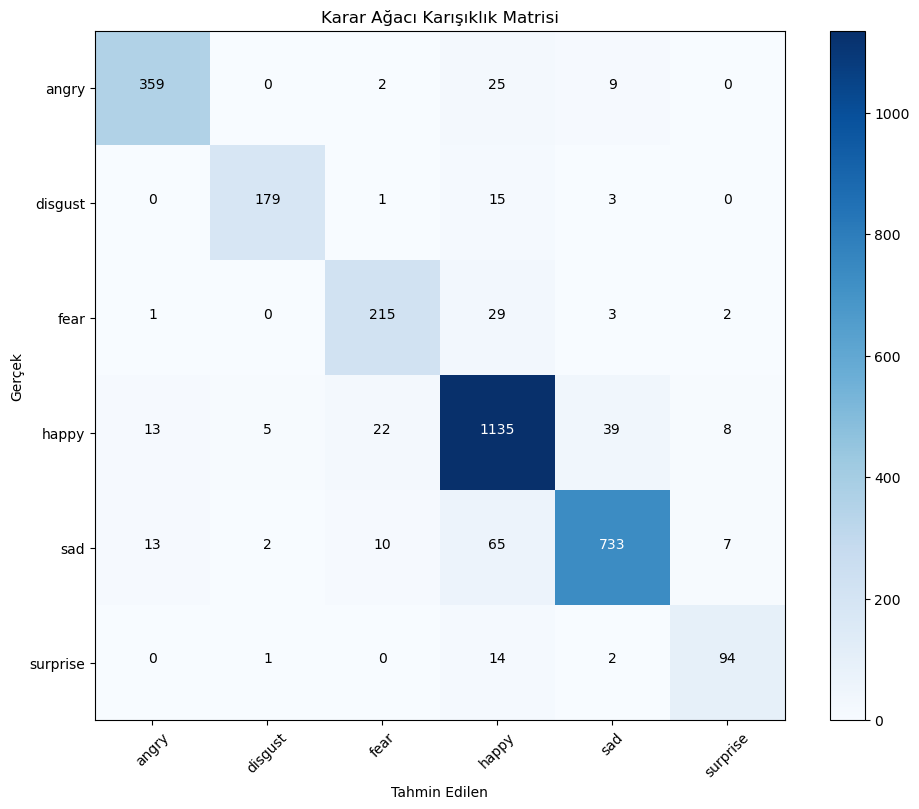

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Karışıklık matrisini hesaplama
cm = confusion_matrix(y_test, preddt)
classes = dt.classes_

# Karışıklık matrisini çizme
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Karar Ağacı Karışıklık Matrisi',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Gerçek')
    plt.xlabel('Tahmin Edilen')

# Karışıklık matrisini çizme
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cm, classes=classes, title='Karar Ağacı Karışıklık Matrisi')
plt.show()


# **Doğruluk Skoru**

In [12]:
# Tahmin edilen değerlerle gerçek değerler arasındaki doğruluk puanını hesaplayın
score = round(accuracy_score(y_test, preddt) * 100, 2)

# Doğruluk puanını ekrana yazdırma
print("Score:", score)


Score: 90.32


# **Sınıflandırma Raporu**

In [13]:
# Sınıflandırma raporunu ekrana yazdırma
print("Sınıflandırma Raporu:")
print(classification_report(y_test, preddt))


Sınıflandırma Raporu:
              precision    recall  f1-score   support

       angry       0.93      0.91      0.92       395
     disgust       0.96      0.90      0.93       198
        fear       0.86      0.86      0.86       250
       happy       0.88      0.93      0.91      1222
         sad       0.93      0.88      0.91       830
    surprise       0.85      0.85      0.85       111

    accuracy                           0.90      3006
   macro avg       0.90      0.89      0.89      3006
weighted avg       0.90      0.90      0.90      3006



In [14]:
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier()
scores = cross_val_score(dt, x, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Average Cross-Validation Score:", scores.mean())


Cross-Validation Scores: [0.41267465 0.52744511 0.56115826 0.74438342 0.66650025]
Average Cross-Validation Score: 0.5824323395146801


In [15]:
# Öncelikle modeli uygun veri ile eğit
dt.fit(x_train, y_train)

# Ardından özellik önemlerini elde et
importances = dt.feature_importances_
feature_names = tf.get_feature_names_out()
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['importance']).sort_values('importance', ascending=False)

# En önemli 20 özellik
print(feature_importances.head(20))


            importance
ed            0.122283
angry         0.025525
irritating    0.017233
annoying      0.016144
happy         0.016078
stun          0.012052
aggravated    0.011726
jealous       0.011638
outraged      0.011617
irritate      0.011378
anxiety       0.011148
astonish      0.010973
shock         0.010922
tensed        0.010772
dread         0.010621
sicken        0.010599
fright        0.010516
annoy         0.010175
sarcasm       0.010089
raped         0.010030


In [16]:
#Hyperparameter
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   1.5s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   1.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   1.5s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   1.5s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   1.5s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   1.6s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   1.6s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   1.6s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   1.3s
[CV] END criterion=gini, max_

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {accuracy:.4f}")


Decision Tree Accuracy: 0.9055
Random Forest Accuracy: 0.8816
SVM Accuracy: 0.7851
Gradient Boosting Accuracy: 0.9015


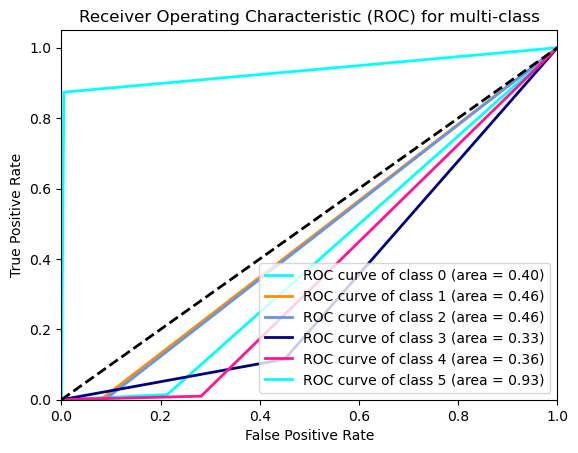

In [18]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the output
y_test_bin = label_binarize(y_test, classes=dataset['Feeling'].unique())
n_classes = y_test_bin.shape[1]

# Learn to predict each class against the other
y_score = grid_search.predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'navy', 'deeppink', 'cyan'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for multi-class')
plt.legend(loc="lower right")
plt.show()


/var/folders/k_/3wnsswks2bxcznxz28y8tvtr0000gn/T/ipykernel_19307/440455782.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='1/1/2022', periods=5, freq='M')
/var/folders/k_/3wnsswks2bxcznxz28y8tvtr0000gn/T/ipykernel_19307/440455782.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Feeling'].resample('M').count().plot(label=feeling)
/var/folders/k_/3wnsswks2bxcznxz28y8tvtr0000gn/T/ipykernel_19307/440455782.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Feeling'].resample('M').count().plot(label=feeling)


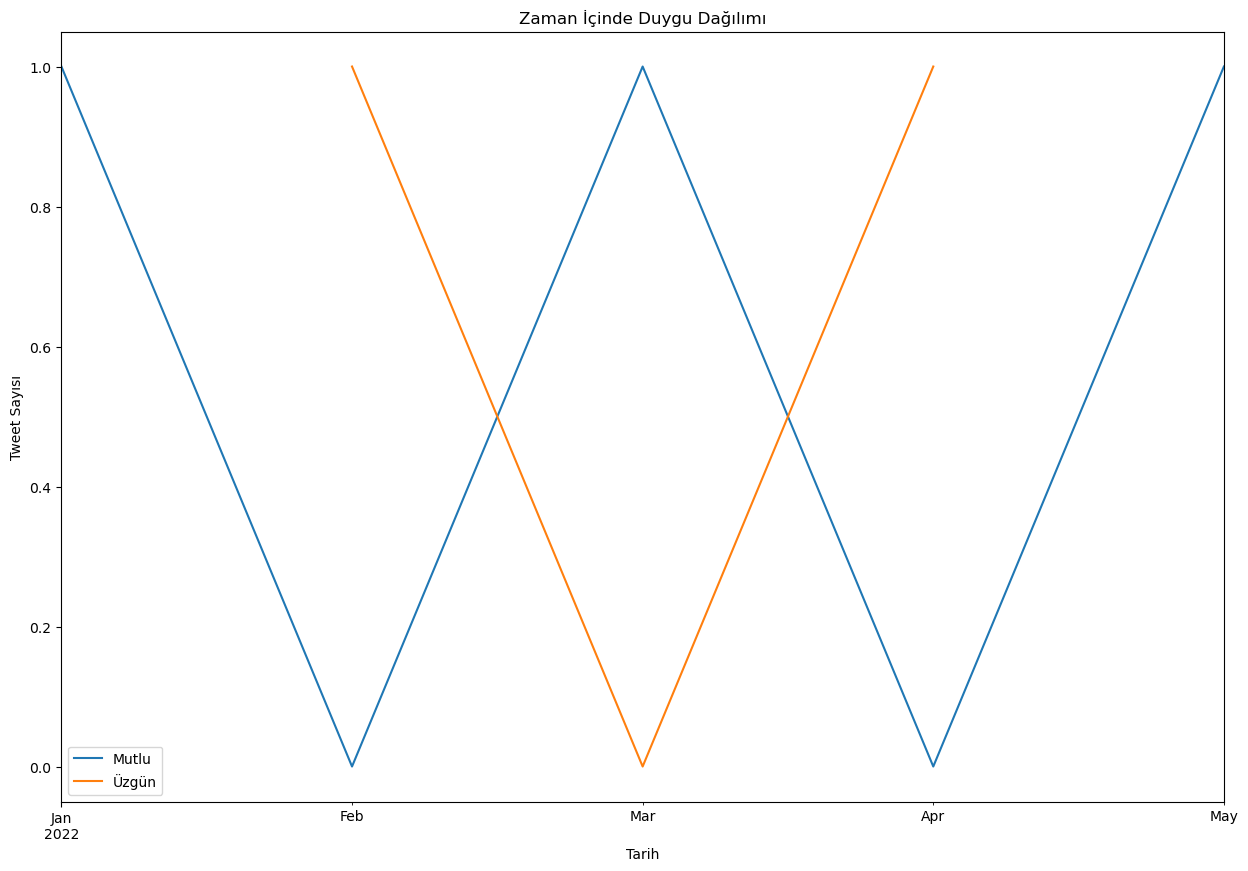

In [19]:
# Örnek tarih verisi ekleme
import pandas as pd
import numpy as np

# Örnek veri seti oluşturma
data = {
    'Tweets': ['Tweet1', 'Tweet2', 'Tweet3', 'Tweet4', 'Tweet5'],
    'Feeling': ['Mutlu', 'Üzgün', 'Mutlu', 'Üzgün', 'Mutlu'],
    'Date': pd.date_range(start='1/1/2022', periods=5, freq='M')
}
dataset = pd.DataFrame(data)

# Tarih sütununu datetime formatına çevirme ve veri setini tarih sütununa göre ayarlama
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date', inplace=True)

# Her duygu için zaman içindeki dağılımı çizme
plt.figure(figsize=(15, 10))
for feeling in dataset['Feeling'].unique():
    data = dataset[dataset['Feeling'] == feeling]
    data['Feeling'].resample('M').count().plot(label=feeling)

plt.legend()
plt.title('Zaman İçinde Duygu Dağılımı')
plt.xlabel('Tarih')
plt.ylabel('Tweet Sayısı')
plt.show()
